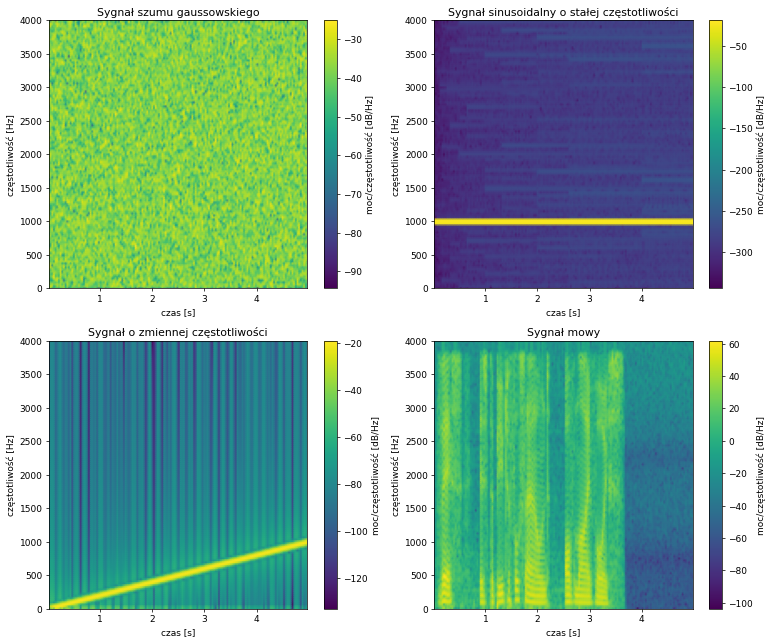

In [ ]:
import numpy as np #importowanie numpy
from matplotlib import rcParams #importowanie rcParams
rcParams['agg.path.chunksize'] = 10000#ustawienie rozmiaru kawałków ścieżek
import matplotlib.pyplot as plt#importowanie matplotlib do tworzenia wykresów
from scipy import signal#importowanie sygnału
from scipy.io import wavfile#importowanie pliu wav

dlugosc = 5#dlugosc sygnalu
fs = 8000 #częstotliwość próbkowania
Ts = 1/fs #Okres próbkowania
N = dlugosc * fs #liczba próbek
t = np.arange(0, dlugosc, Ts) #czas trwania 
szum = np.random.normal(0, 1, N) #generowanie szumu
sin = np.sin(2*np.pi*1000 * t)#generowanie funkcji sinus
chirp = signal.chirp(t, 0, 5, 1000)#generowanie zawężającego się sygnału
mowa = wavfile.read('/content/drive/MyDrive/My Voice 8kHz.wav')[1]#wczytywanie nagrania z pliku

dpi = 65 #ustawienie stałego dpi
fig, axs = plt.subplots(2, 2);#tworzenie subplotów 
fig.set_size_inches(12, 10)#ustawienie rozmiaru wykresów
fig.set_dpi(dpi)#ustawienie dpi wykresów
f, t, Sxx = signal.spectrogram(szum, fs=fs, window='hamming', nperseg=256, noverlap=0)#tworzenie spektogramu
ax = axs[0,0]; #ustawienie ax na subplot o indexach 0,0
ax.set_xlabel('czas [s]') #ustawienie tytulu osi x
ax.set_ylabel('częstotliwość [Hz]') #ustawienei tytulu osi y
ax.set_title('Sygnał szumu gaussowskiego') #ustawienie tytułu
mesh = ax.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud') #ustawienie kolorów wykresu
cb = fig.colorbar(mesh, ax=ax, orientation='vertical') #ustawienie skali kolorów
cb.set_label('moc/częstotliwość [dB/Hz]')#ustawienie nazwy skali

f, t, Sxx = signal.spectrogram(sin, fs=fs, window='hamming', nperseg=256, noverlap=0)#tworzenie spektogramu
ax = axs[0,1]; #ustawienie ax na subplot o indexach 0,1
ax.set_xlabel('czas [s]') #ustawienie nazwy osi x
ax.set_ylabel('częstotliwość [Hz]') #ustawienie nazwy osi y
ax.set_title('Sygnał sinusoidalny o stałej częstotliwości')#ustawienie tytułu wykresu
mesh = ax.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud') #ustawienie kolorów wykresu
cb = fig.colorbar(mesh, ax=ax, orientation='vertical')#ustawienie skali kolorów
cb.set_label('moc/częstotliwość [dB/Hz]')#ustawienie nazwy skali

f, t, Sxx = signal.spectrogram(chirp, fs=fs, window='hamming', nperseg=256, noverlap=0)#tworzenie spektogramu
ax = axs[1,0]; #ustawienie ax na subplot o indexach 1,0
ax.set_xlabel('czas [s]') #ustawienie nazwy osi x
ax.set_ylabel('częstotliwość [Hz]') #ustawienie nazwy osi y
ax.set_title('Sygnał o zmiennej częstotliwości')#ustawienie tytułu wykresu
mesh = ax.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')#ustawienie kolorów wykresu 
cb = fig.colorbar(mesh, ax=ax, orientation='vertical')#ustawienie skali kolorów
cb.set_label('moc/częstotliwość [dB/Hz]')#ustawienie nazwy skali

f, t, Sxx = signal.spectrogram(mowa, fs=fs, window='hamming', nperseg=256, noverlap=0)#tworzenie spektogramu
ax = axs[1,1]; #ustawienie ax na subplot o indexach 1,1
ax.set_xlabel('czas [s]') #tworzenie nazwy osi x
ax.set_ylabel('częstotliwość [Hz]') #tworzenie nazwy osi y
ax.set_title('Sygnał mowy')#tworzenie tytułu wykresu
mesh = ax.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')#ustawienie kolorów wykresu
cb = fig.colorbar(mesh, ax=ax, orientation='vertical') #ustawienie skali kolorów
cb.set_label('moc/częstotliwość [dB/Hz]')#ustawienie nazwy skali
fig.set_tight_layout(tight=True)#ustawienie rozłożenia na ścisłe


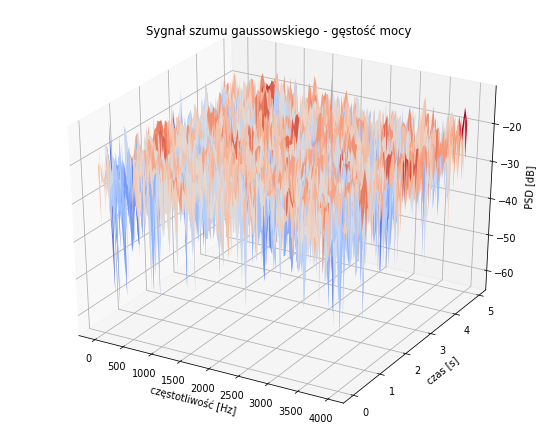

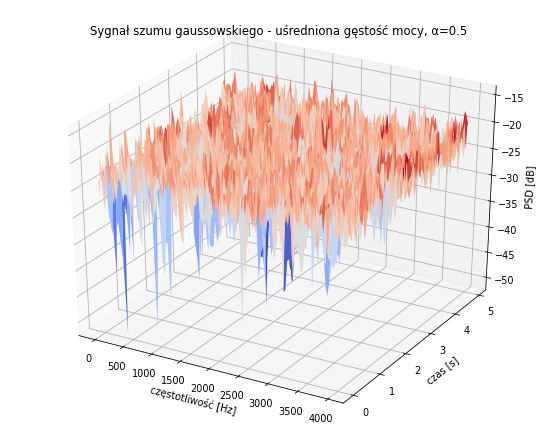

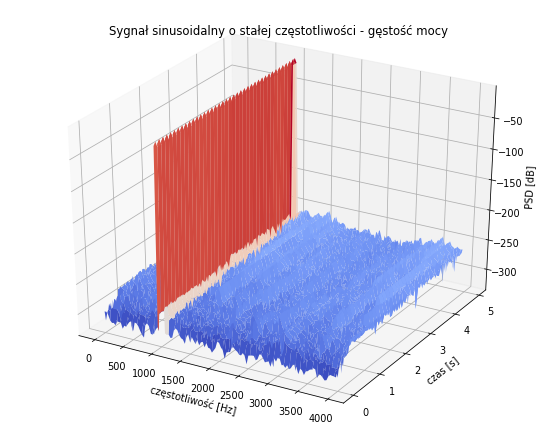

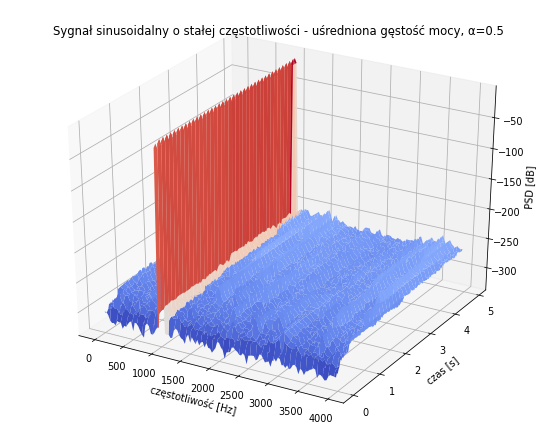

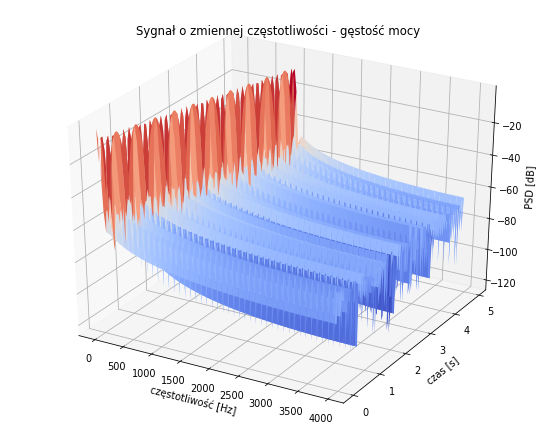

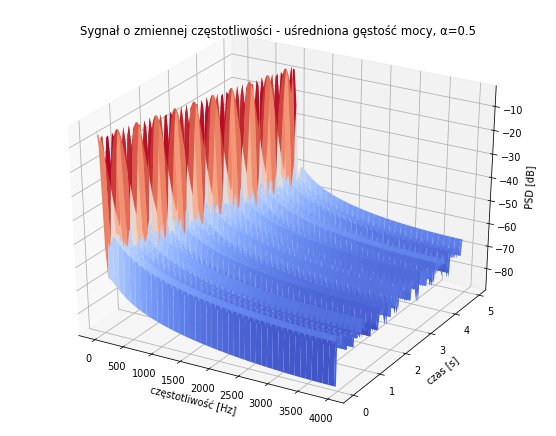

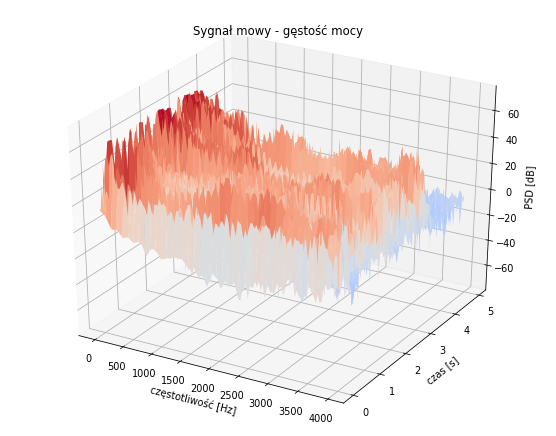

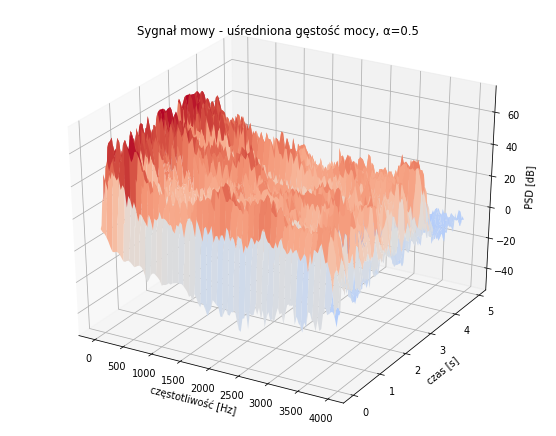

In [ ]:
from matplotlib import cm

def spektrogram(x, fs, window='hamming', nperseg=128, noverlap=64, NFFT=128): #tworzenie spektogramu o 
    N = len(x) # długość  sygnału
    dn = nperseg - noverlap # liczba próbek, o które przesuwamy okno, przechodząc do kolejnego segmentu
    L = int(np.floor( (N - nperseg) / dn) ) # liczba pełnych segmentów, które zmieszczą się w sygnale
    A = np.zeros((NFFT, L), dtype=complex) # tablica krótkookresowych widm zespolonych kolejnych segmentów
    okno = signal.get_window(window, nperseg) # próbki okna Hamminga o długości równej długości segmentu
    xSeg = np.zeros(nperseg) # tablica próbek sygnału znajdujących się w aktualnym segmencie
    l = 0 # licznik segmentów

    while l < L:  #przechodzimy po wszystkich pełnych segmentach sygnału
        xSeg[0 : nperseg] = x[l*dn + np.arange(nperseg)] # przepisujemy próbki aktualnego segmentu z tablicy x do tablicy xSeg
        A[:, l] = np.fft.fft(okno * xSeg, NFFT) # wymnażamy próbki aktualnego segmentu przez okno i obliczamy FFT
        l += 1#iteracja

    A = A[0:(nperseg//2), :] # usunięto połowę widma krótkookresowego każdego segmentu
    t = np.arange(0, L) * dn / fs # wyznaczamy wartości osi czasu
    f = np.arange(0, nperseg//2) * fs / nperseg # wartosc osi czestotliwosci
    modulA = np.abs(A) # wyznaczamy moduły widm krótkookresowych
    modulA /= np.sum(okno) # skalujemy moduły widm
    S = modulA ** 2 # wyznaczamy moc z modułów widm
    return (f, t, S)#zwracanie częstotliwości,czasu trwania oraz mocy

def usrednij(x, alpha):#usrednianie spektogramu
    Px = np.empty(len(x))#Tworzenie pustego zbioru o dlugosci sygnalu 
    Px[0] = (1-alpha)*x[0]#usrednienie pierwszego elementu
    n = 1#iterujemy od 1, bo dla 0 mamy inny wzór
    while n <= len(x)-1:#pętla od n=1 do długości sygnalu-1, ze względu na indeksowanie tablicy od 0
        Px[n] = alpha*Px[n-1] + (1-alpha)*x[n]#Wypelnianie zbioru usrednieniami
        n += 1#iteracja
    return Px#zwracanie wartości

def spektrogramUsredniony(x, fs, alpha=0.5, window='hamming', nperseg=128, noverlap=64, NFFT=128):#tworzenie spektogramu uśrednionego
    f, t, S = spektrogram(x, fs, window, nperseg, noverlap, NFFT)#tworzenie spektogramu
    i = 0
    while i < len(f):#pętla idąca od 0 aż do ilości częstotliwości
        wiersz = S[i, :] # pobieranie całej jednej częstotliwości spektrogramu
        S[i, :] = usrednij(wiersz, alpha) # uśrednianie
        i += 1#iteracja
    return (f, t, S)#zwracanie wartości

dlugosc = 5#dlugosc
fs = 8000 #częstotliwość próbkowania
Ts = 1/fs #Okres próbkowania
N = int(dlugosc * fs) #ilość próbek
t = np.arange(0, dlugosc, Ts) #czas trwania
szum = np.random.normal(0, 1, N) #generowanie szumu
sin = np.sin(2*np.pi*1000 * t) #tworzenie funkcji sinus zależnej od czasu
chirp = signal.chirp(t, 0, 5, 1000) #tworzenie funkcji zawężającej wykres wraz z czasem trwania sygnału
mowa = wavfile.read('/content/drive/MyDrive/My Voice 8kHz.wav')[1]#wczytywanie nagrania z pliku

# wykresy trójwymiarowe
dpi = 70;#ustawienie stałego dpi

f, t, S = spektrogram(szum, fs=fs, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektograu
fig = plt.figure(figsize=(10,8), dpi=dpi)#ustawianie rozmiaru figury
ax = fig.gca(projection='3d')#zmiana wykresu na trojwymiarowy
ax.set_ylabel('czas [s]')#ustawienie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]')#ustawienie nazwy osi x
ax.set_zlabel('PSD [dB]')#ustawienie nazwy osi z
ax.set_title('Sygnał szumu gaussowskiego - gęstość mocy')#ustawienie tytułu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie

f, t, S = spektrogramUsredniony(szum, fs=fs, alpha=0.5, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektogramu uśrednionego
fig = plt.figure(figsize=(10,8), dpi=dpi) #ustawianie rozmiaru wykresu
ax = fig.gca(projection='3d')#zmiana wykresu na trojwymiarowy
ax.set_ylabel('czas [s]')#ustawianie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]')#ustawienie nazwy osi x
ax.set_zlabel('PSD [dB]')#ustawienie nazwy osi z
ax.set_title('Sygnał szumu gaussowskiego - uśredniona gęstość mocy, α=0.5')#ustawienie tytułu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie


f, t, S = spektrogram(sin, fs=fs, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektogramu
fig = plt.figure(figsize=(10,8), dpi=dpi) #ustawianie rozmiaru wykresu
ax = fig.gca(projection='3d')#zmiana wykresu na trojwymiarowy
ax.set_ylabel('czas [s]')#ustawianie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]') #ustawianie nazwy osi x
ax.set_zlabel('PSD [dB]')#ustawianie nazwy osi z
ax.set_title('Sygnał sinusoidalny o stałej częstotliwości - gęstość mocy')#ustawianie tytulu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie

f, t, S = spektrogramUsredniony(sin, fs=fs, alpha=0.5, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektogramu uśrednionego
fig = plt.figure(figsize=(10,8), dpi=dpi)#ustawienie rozmiaru wykresu
ax = fig.gca(projection='3d')#ustawienie typu wykresu na trojwymiarowy
ax.set_ylabel('czas [s]')#ustawienie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]')#ustawienie nazwy osi x
ax.set_zlabel('PSD [dB]')# ustawienie nazwy osi z
ax.set_title('Sygnał sinusoidalny o stałej częstotliwości - uśredniona gęstość mocy, α=0.5')#ustawienie tytułu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie


f, t, S = spektrogram(chirp, fs=fs, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektogramu
fig = plt.figure(figsize=(10,8), dpi=dpi) #ustawienie rozmiaru wykresu
ax = fig.gca(projection='3d')#ustawienie typu wykresu na trójwymiarowy
ax.set_ylabel('czas [s]')#ustawienie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]') #ustawienie nazwy osi x
ax.set_zlabel('PSD [dB]')#ustawienie nazwy osi z
ax.set_title('Sygnał o zmiennej częstotliwości - gęstość mocy')#ustawienie tytułu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie

f, t, S = spektrogramUsredniony(chirp, fs=fs, alpha=0.5, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektogramu uśrednionego
fig = plt.figure(figsize=(10,8), dpi=dpi)#ustawienie rozmiaru wykresu
ax = fig.gca(projection='3d')#ustawienie typu wykresu na trójwymiarowy
ax.set_ylabel('czas [s]')#ustawienie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]')#ustawienie nazwy osi x
ax.set_zlabel('PSD [dB]')#ustawienie nazwy osi z
ax.set_title('Sygnał o zmiennej częstotliwości - uśredniona gęstość mocy, α=0.5')#ustawienie tytułu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie


f, t, S = spektrogram(mowa, fs=fs, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektogramu
fig = plt.figure(figsize=(10,8), dpi=dpi) #ustawienie wymiarów wykresu
ax = fig.gca(projection='3d')#ustawienie typu wykresu na 3d
ax.set_ylabel('czas [s]')#ustawienie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]')#ustawienie nazwy osi x
ax.set_zlabel('PSD [dB]') #ustawienie nazwy osi z
ax.set_title('Sygnał mowy - gęstość mocy')#ustawienie tytułu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie

f, t, S = spektrogramUsredniony(mowa, fs=fs, alpha=0.5, window='hamming', nperseg=256, NFFT=256, noverlap=0)#tworzenie spektogramu uśrednionego
fig = plt.figure(figsize=(10,8), dpi=dpi)#ustawienie wymiarów wykresu
ax = fig.gca(projection='3d')#ustawienie typu wykresu na 3d
ax.set_ylabel('czas [s]')#ustawienie nazwy osi y
ax.set_xlabel('częstotliwość [Hz]')#ustawienie nazwy osi x
ax.set_zlabel('PSD [dB]')#ustawienie nazwy osi z
ax.set_title('Sygnał mowy - uśredniona gęstość mocy, α=0.5')#ustawienie tytulu wykresu
ax.plot_surface(f[:, None], t[None, :], 10*np.log10(S), cmap=cm.coolwarm)#tworzenie powierzchni na wykresie

